# Declaration of Originality

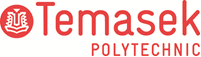

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Oscar Chin (2404062H)
* Tutorial Group                : P06
* Tutor						    : Mr Emile Sabastian
* Submission Date               : 11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [31]:
## Import libraries
# This cell imports all core libraries required for data handling,
# visualisation, and exploratory data analysis (EDA). These libraries
# will be used throughout the project to inspect the dataset, identify
# patterns, and support data-driven modelling decisions.

# ==============================
# Core Libraries
# ==============================
# NumPy is used for numerical computations and array operations,
# while Pandas is used for data manipulation, cleaning, and analysis
# of the tabular credit card default dataset.
import numpy as np
import pandas as pd

# ==============================
# Visualisation Libraries
# ==============================
# Matplotlib and Seaborn are used to generate visualisations such as
# distributions, boxplots, and correlation heatmaps, which help in
# understanding feature behaviour, detecting outliers, and analysing
# relationships between features and the target variable.
import matplotlib.pyplot as plt
import seaborn as sns




# 1. Business Understanding
Goal: 
The goal of this project is to develop a supervised machine learning classification model that predicts whether a credit card customer is likely to default on their next payment. This model is intended to support financial institutions in identifying high-risk borrowers early, enabling better credit risk management decisions such as loan approval, credit limit adjustment, or manual review. By improving the early detection of potential defaulters, the organisation can reduce financial losses while maintaining efficient and fair credit allocation.

What the columns mean?<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above<br>
PAY_2: Repayment status in August, 2005 (scale same as above)<br>
PAY_3: Repayment status in July, 2005 (scale same as above)<br>
PAY_4: Repayment status in June, 2005 (scale same as above)<br>
PAY_5: Repayment status in May, 2005 (scale same as above)<br>
PAY_6: Repayment status in April, 2005 (scale same as above)<br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)<br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)<br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)<br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)<br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)<br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)<br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)<br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)<br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)<br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)<br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)<br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)<br>

# 2. Data Understanding

## 2.1 Load dataset

In [32]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('Credit Card Defaulter Prediction.csv')


# The dataset is loaded from a CSV file into a Pandas DataFrame for
# further exploration, preprocessing, and model development.
# This dataset contains historical credit card customer information
# and a binary target variable indicating whether a customer
# defaulted on their payment, making it suitable for a supervised
# classification task.

## 2.2 Summary Statistics

In [33]:
## Understand the type of variable for each column
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

print("Data Types:")
print(df.dtypes)

print("\nFirst few rows:")
df.head()



# This cell provides an initial overview of the dataset structure.
# It examines the number of rows and columns, the data type of each
# feature, and a preview of the first few records.
#
# Understanding variable types (numerical vs categorical) is critical
# for deciding appropriate preprocessing steps such as scaling,
# encoding, and imputation during model development.

Dataset Shape:
Rows: 30000, Columns: 25

Data Types:
ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
              ...  
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
Length: 25, dtype: object

First few rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N



The dataset consists of 30,000 records and 25 features, providing a sufficiently large sample for supervised classification modelling. <br>Most variables are numerical, representing financial information such as credit limits, billing amounts, repayment behaviour, and customer age. Several variables, including SEX, EDUCATION, MARRIAGE, and the target variable default, are categorical in nature and stored as object types. <br>This mix of numerical and categorical features indicates that different preprocessing strategies will be required, such as feature scaling for numerical variables and One-Hot encoding for categorical variables. <br>The default column is identified as the target variable, representing whether a customer defaulted on their payment, and will be transformed into an appropriate numerical format during model development.

In [34]:
# ==============================
# Missing Data Analysis
# ==============================
# This cell checks for the presence of missing values across all
# features in the dataset. Identifying missing data is an important
# data quality step, as missing values can affect model training and
# evaluation if not handled appropriately.
#
# Both the absolute count and percentage of missing values are
# computed for each column to assess whether imputation or data
# cleaning is required before modelling.

## Check for missing data

df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
            ..
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
Length: 25, dtype: int64


The missing value analysis shows that no missing values are present across all 25 columns in the dataset. This indicates that the dataset is complete and does not require any imputation at this stage. However, despite the absence of missing data, imputation steps will still be included in the preprocessing pipeline to ensure robustness and generalisability when handling future or unseen data during deployment.

If missing values were present, different handling strategies would be applied depending on the nature of the affected variables. For numerical features, missing values would be imputed using the median, as it is robust to outliers commonly found in financial data. For categorical features, missing values would be imputed using the most frequent category to preserve the existing data distribution. These imputation steps would be implemented within a preprocessing pipeline to prevent data leakage and ensure consistency between training and testing data. This approach balances data retention with model reliability and reflects common real-world practices in credit risk modelling.

In [35]:
# ==============================
# Descriptive Statistics
# ==============================
# This cell generates descriptive statistics for the numerical
# features in the dataset, including measures such as mean,
# standard deviation, minimum, and maximum values.
#
# These statistics provide an overview of the data distribution,
# help identify potential skewness or extreme values, and support
# further analysis such as outlier detection and feature scaling
# decisions during preprocessing.


## Describe data distribution
print("Descriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
              ID       LIMIT_BAL    SEX   EDUCATION MARRIAGE         AGE  \
count   30000.00    30000.000000  30000       30000    30000  30000.0000   
unique       NaN             NaN      2           6        4         NaN   
top          NaN             NaN      F  University   Single         NaN   
freq         NaN             NaN  18112       14030    15964         NaN   
mean    15000.50   167484.322667    NaN         NaN      NaN     35.4855   
...          ...             ...    ...         ...      ...         ...   
min         1.00    10000.000000    NaN         NaN      NaN     21.0000   
25%      7500.75    50000.000000    NaN         NaN      NaN     28.0000   
50%     15000.50   140000.000000    NaN         NaN      NaN     34.0000   
75%     22500.25   240000.000000    NaN         NaN      NaN     41.0000   
max     30000.00  1000000.000000    NaN         NaN      NaN     79.0000   

             PAY_0         PAY_2       PAY_3         PAY_4  ...

The repayment status variables (PAY_0 to PAY_6) represent the customer’s payment behaviour over the six months prior to the default outcome, where negative and zero values indicate timely repayment and positive values indicate varying degrees of payment delay. 
The descriptive statistics show that these variables are centered close to zero, suggesting that the majority of customers generally make timely payments, while a smaller subset exhibits delayed repayment behaviour. This aligns with expectations in real-world credit datasets, where defaults are relatively less frequent. 
In contrast, financial amount variables such as LIMIT_BAL, BILL_AMT, and PAY_AMT display wide ranges and large standard deviations, reflecting substantial differences in customers’ credit exposure and spending behaviour. 
The presence of extreme values in billing and payment amounts likely reflects genuine high-value customers rather than data errors, indicating that these values should be handled carefully rather than removed. Overall, these observations reinforce the need for feature scaling and support the use of repayment history as a key predictor in loan default modelling.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

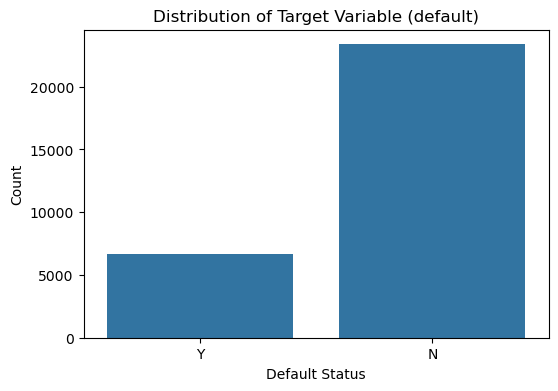

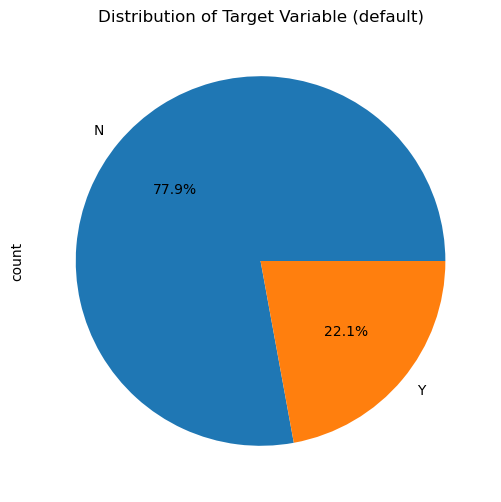

In [36]:
### Understanding Distribution of Target

# The target variable represents whether a credit card customer defaulted on their payment. Examining the distribution of the target variable is important to understand whether the dataset is balanced or imbalanced, as this directly influences model evaluation and metric selection.

# In credit risk prediction, default cases are typically less frequent than non-default cases. If the target distribution is imbalanced, relying solely on accuracy may be misleading, as a model could achieve high accuracy by predicting the majority class. Therefore, understanding the target distribution helps justify the selection of evaluation metrics that better reflect business risk, such as recall and F1-score.


# Standardise column names by removing leading/trailing whitespace (due to CSV formatting issues)
df.columns = df.columns.str.strip()

col_y='default'
## Plot 
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=col_y)
plt.title('Distribution of Target Variable (default)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

df[col_y].value_counts()

## Plot pie chart for target variable distribution
df[col_y].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Distribution of Target Variable (default)')
plt.show()


The target variable shows a clear class imbalance, with 23,364 non-default cases (N) and 6,636 default cases (Y). This indicates that the majority of customers do not default on their payments, which is consistent with real-world credit card datasets where default events are relatively infrequent. Due to this imbalance, accuracy alone would be a misleading evaluation metric, as a model could achieve high accuracy by predominantly predicting the majority non-default class. Therefore, metrics such as recall, precision, and F1-score are more appropriate for evaluating model performance, with recall being particularly important to minimise the risk of failing to identify customers who are likely to default.

### 2.3.1.2 Understanding distribution of features

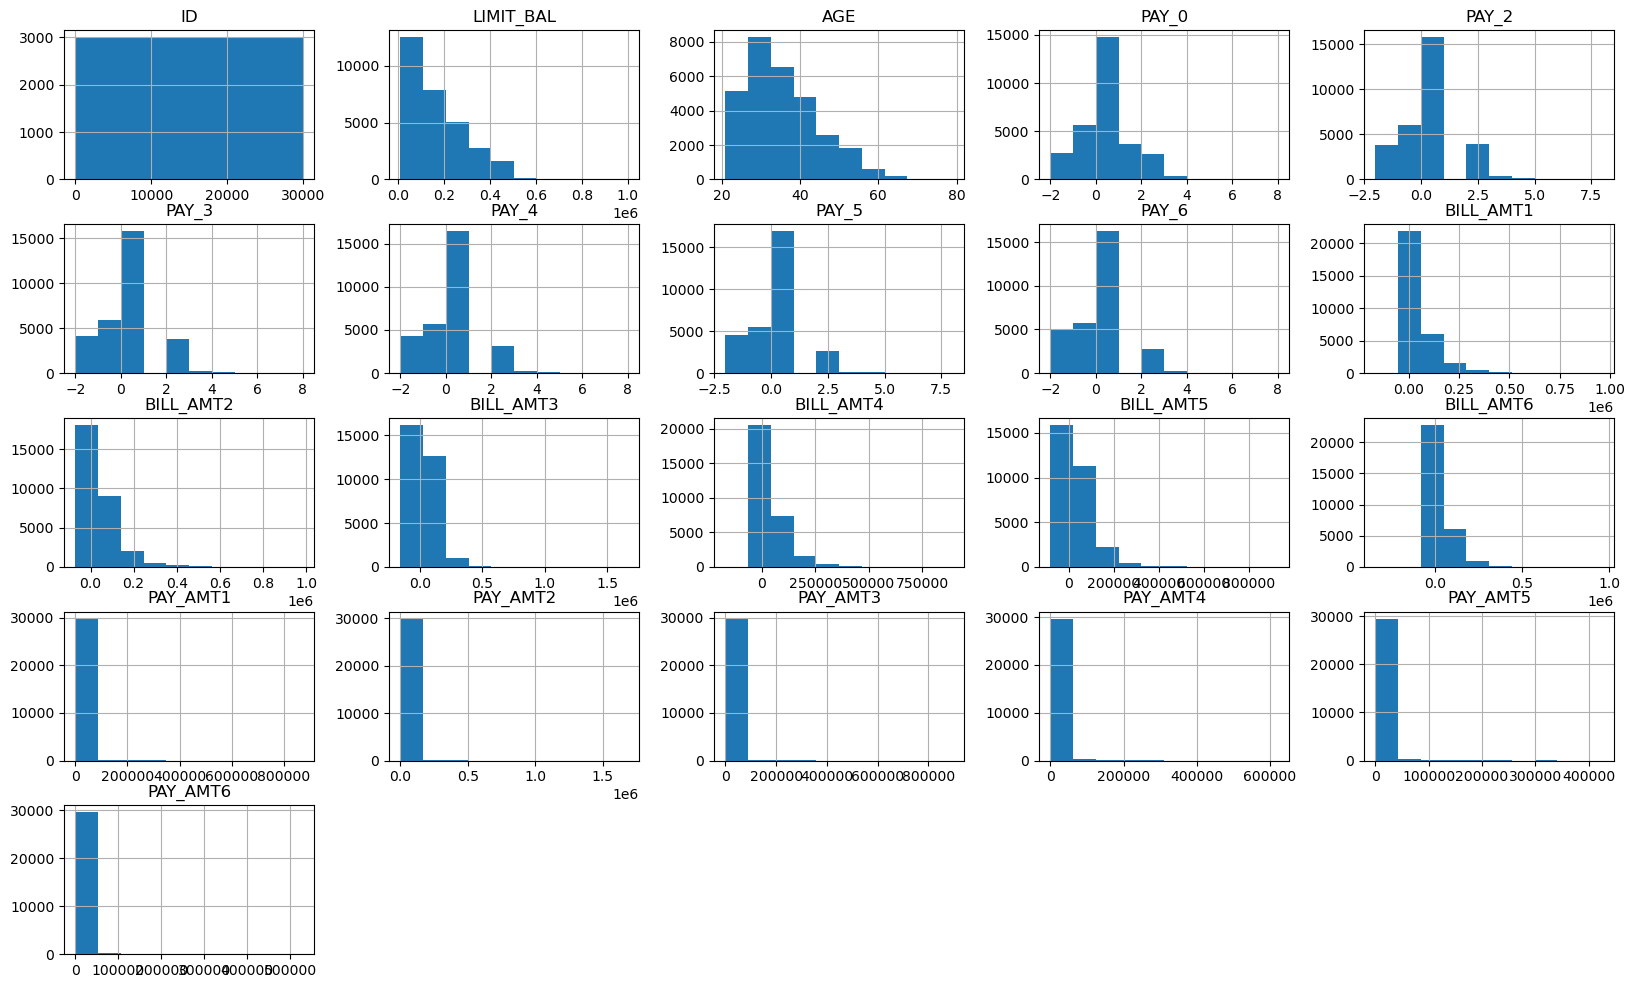

In [37]:
df.hist(figsize=(20, 12))
plt.show()


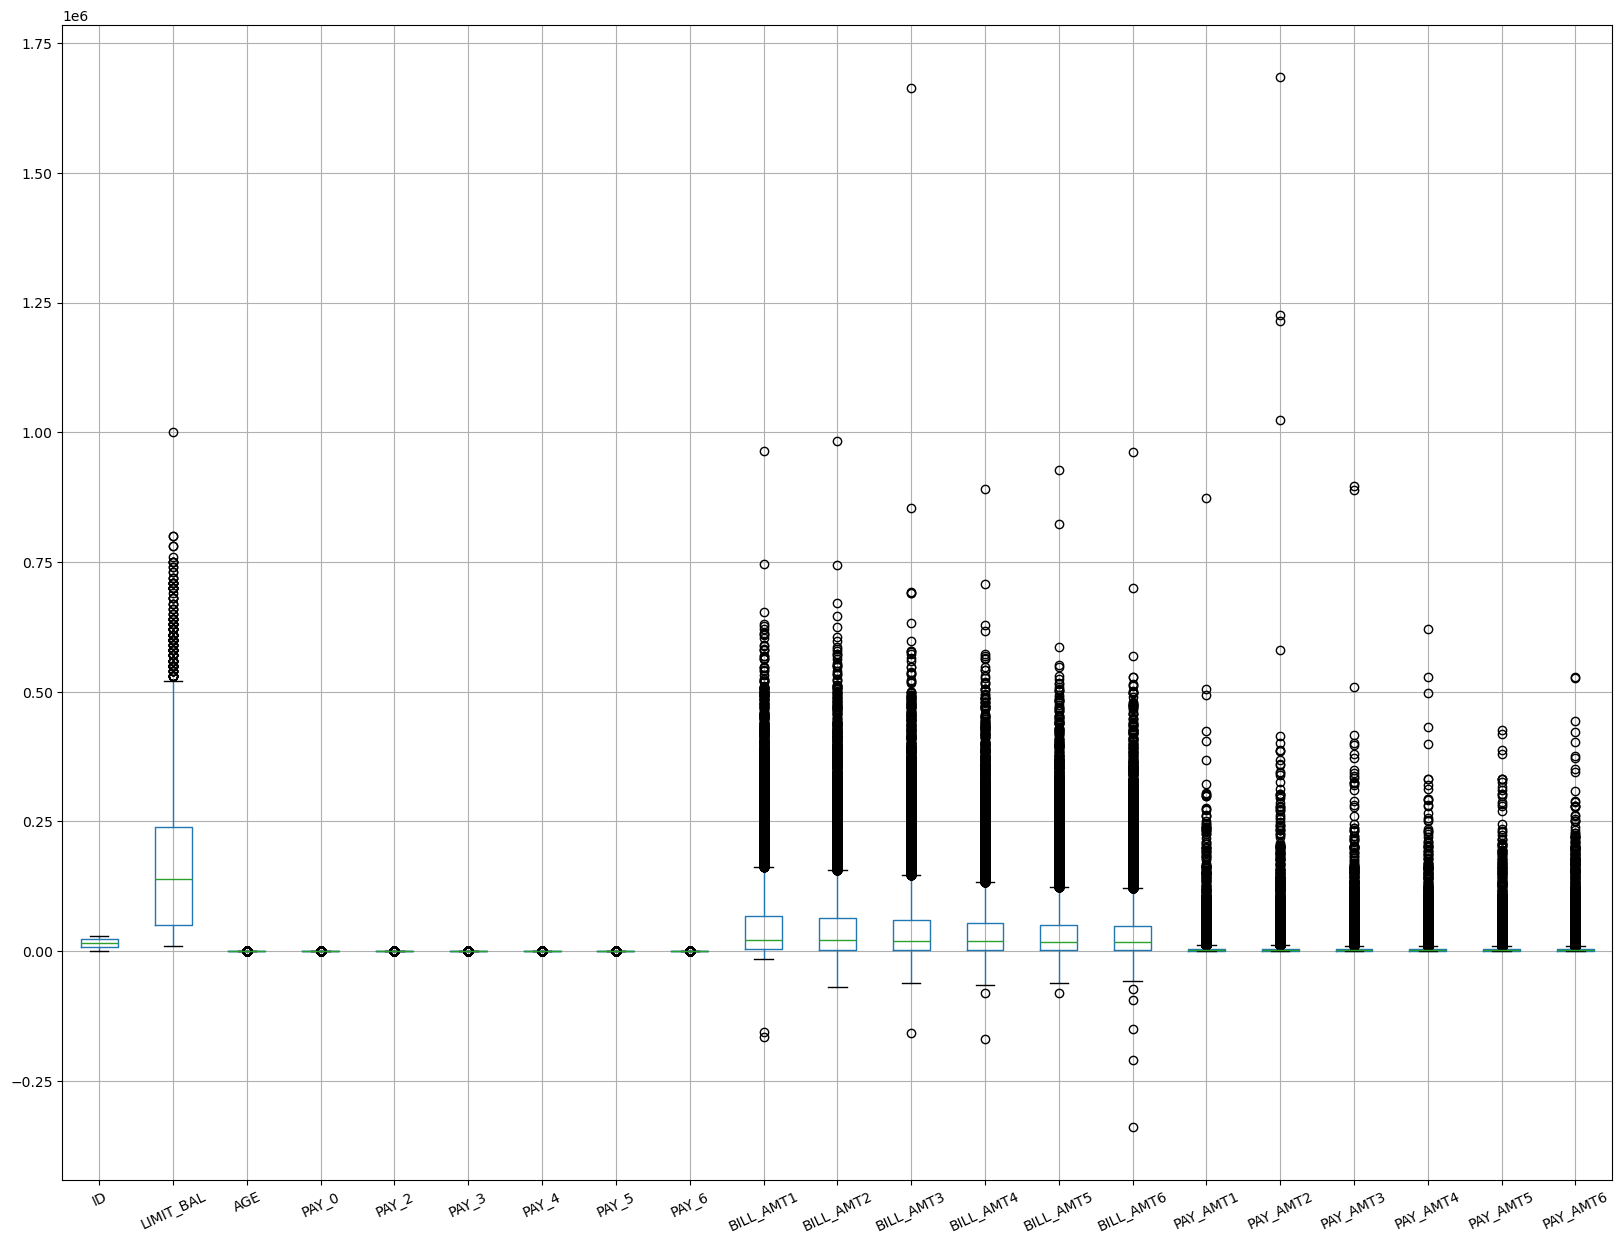

In [38]:
### Plot boxplot for different features
df.boxplot(rot=25,figsize=(20, 15))
plt.show()

The feature distributions reveal significant variation across financial variables. Credit limit, billing amounts, and payment amounts exhibit strong right-skewed distributions with long tails, indicating that a small proportion of customers have substantially higher credit exposure and repayment values compared to the majority. The boxplots further highlight the presence of numerous extreme values, particularly in billing and payment-related features. In the context of credit card data, these extreme values are expected and likely represent legitimate high-value or high-risk customers rather than data errors. Repayment status variables are largely centred around timely repayment categories, with fewer cases showing prolonged payment delays. These observations suggest that feature scaling is necessary to prevent large-magnitude variables from dominating model training, while outliers should be handled cautiously rather than removed outright to preserve real-world behaviour.

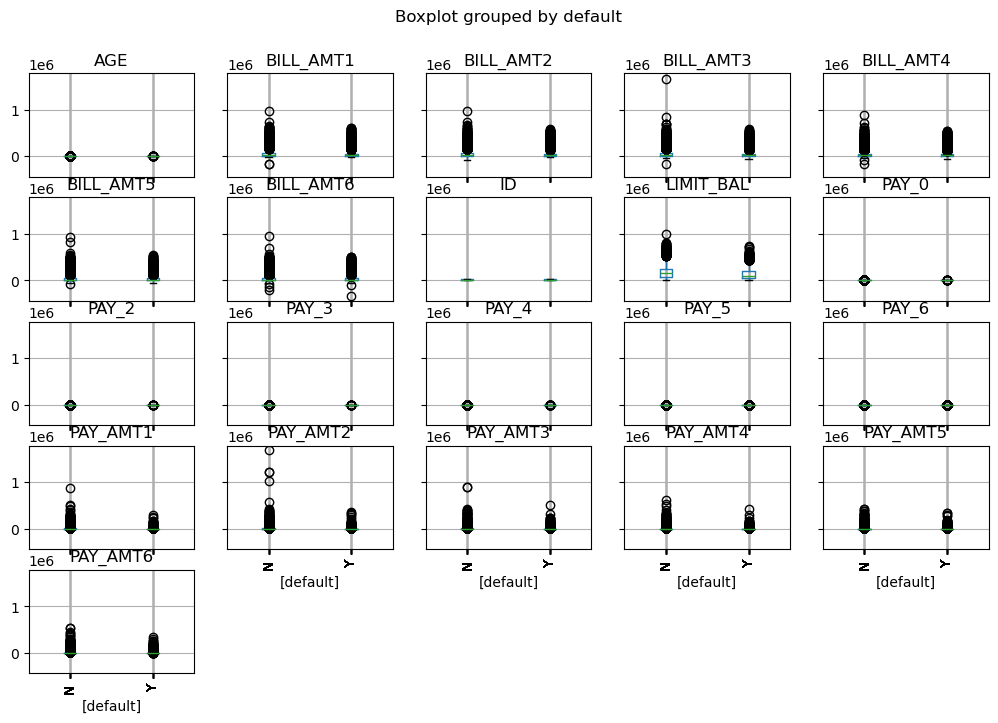

In [39]:
df.boxplot(by='default', rot=90, figsize=(12, 8))
plt.show()

The grouped boxplots highlight clear differences in feature distributions between customers who defaulted and those who did not. Repayment status variables (PAY_0 to PAY_6) show strong separation between the two groups, with defaulters exhibiting higher median values and greater variability, indicating more frequent and severe payment delays. This suggests that historical repayment behaviour is a key predictor of default risk. Financial amount variables such as billing and payment amounts display heavy skewness and numerous extreme values, with overlapping distributions between defaulters and non-defaulters, indicating that these features alone may not be sufficient for discrimination but can provide complementary information when combined with repayment history. Overall, these patterns support the use of models capable of capturing non-linear relationships and interactions between features, as well as the need for appropriate feature scaling.

The ID feature is included for completeness but will not be used for model training, as it does not carry predictive information.

### 2.3.2 Understanding relationship between variables

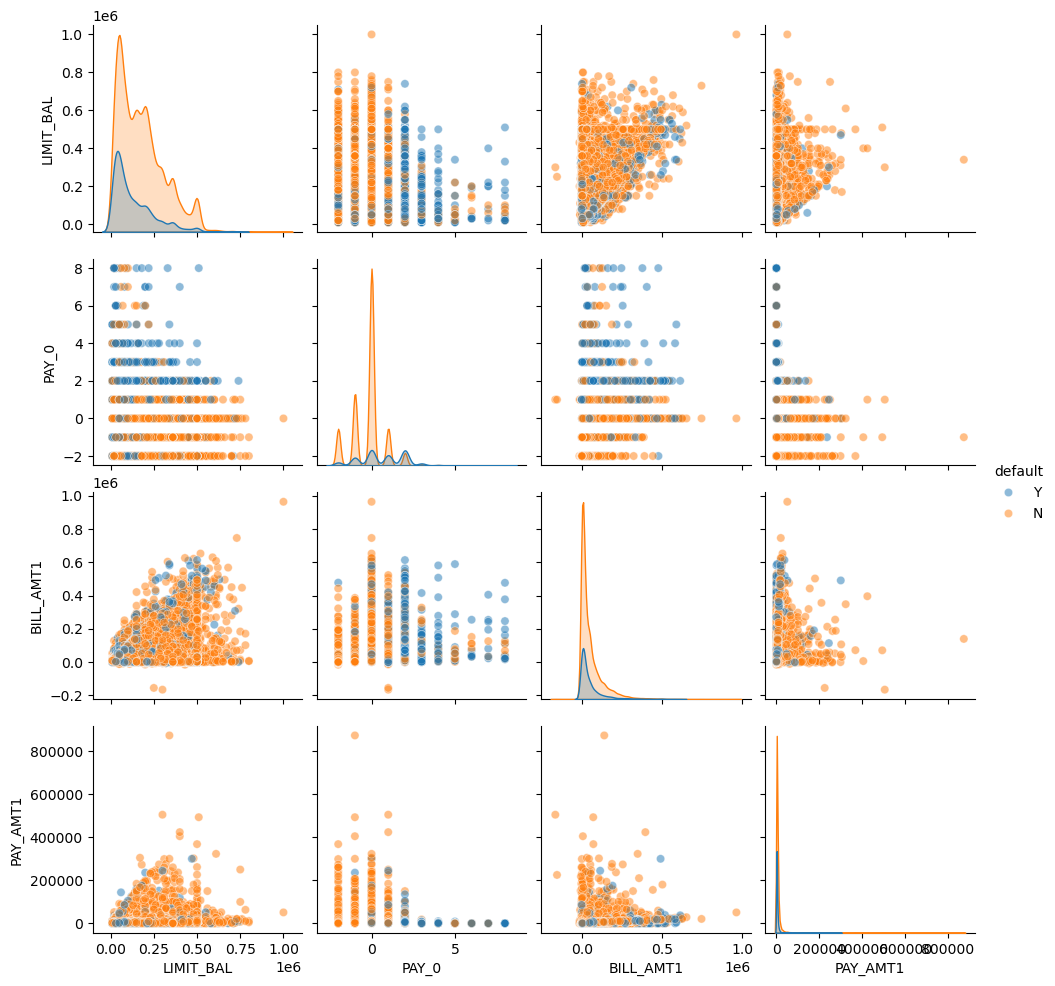

In [40]:
selected_features = [
    'LIMIT_BAL',
    'PAY_0',
    'BILL_AMT1',
    'PAY_AMT1',
    'default'
]

sns.pairplot(
    df[selected_features],
    hue='default',
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)
plt.show()


The pairplot reveals distinct differences in how selected features interact for defaulters and non-defaulters. Repayment status (PAY_0) shows the clearest separation, with defaulters concentrated at higher delay levels, reinforcing its importance as a predictor of default risk. Credit limit (LIMIT_BAL) also exhibits moderate separation, with non-defaulters tending to have higher limits. In contrast, billing and payment amount features (BILL_AMT1, PAY_AMT1) display heavy skewness and substantial overlap between the two classes, indicating that these variables alone are insufficient for clear discrimination. The observed non-linear patterns and overlapping distributions suggest that default risk is influenced by interactions between multiple features rather than any single variable, supporting the use of models capable of capturing complex, non-linear relationships.

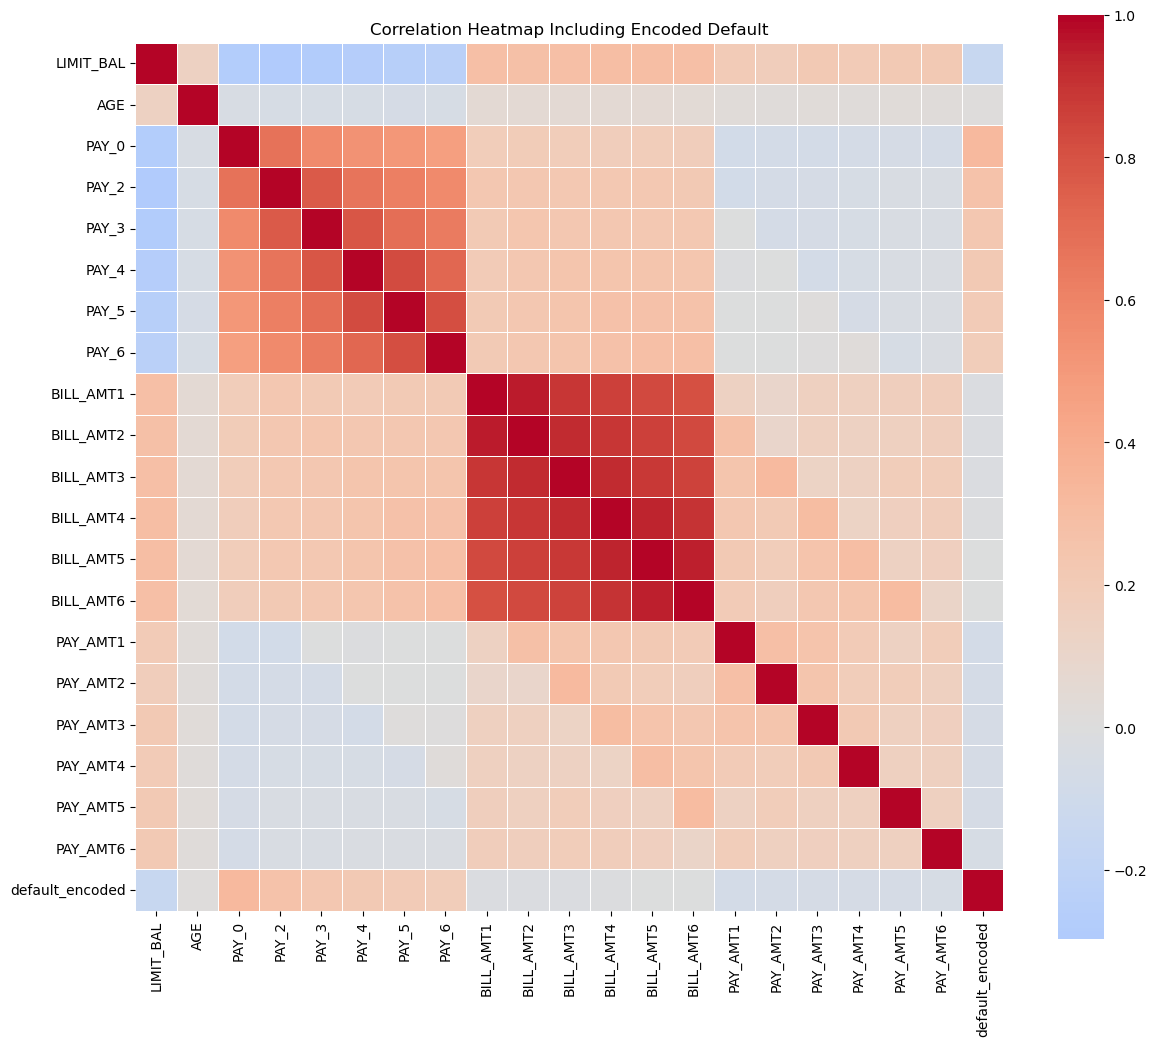

In [41]:
# Encode target variable for correlation analysis
df['default_encoded'] = df['default'].map({'N': 0, 'Y': 1})

# Select numerical features and encoded target
corr_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

# Compute correlation matrix
corr_matrix = corr_features.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title('Correlation Heatmap Including Encoded Default')
plt.show()


The correlation heatmap including the encoded target variable shows that repayment status features (PAY_0–PAY_6) have the strongest positive linear association with default risk, indicating that customers with greater payment delays are more likely to default. In contrast, billing and payment amount variables exhibit weaker correlations with the target, suggesting that financial magnitude alone is not a strong determinant of default behaviour. Credit limit and age show minimal correlation with default risk, highlighting the limited predictive power of demographic and static attributes when considered independently. As correlation analysis captures only linear relationships, these findings complement earlier visual analyses and support the use of models capable of capturing non-linear patterns and interactions between behavioural and financial features.

# 3. Data Preparation

## 3.1 Data Cleaning

### Data Cleaning Overview

The data cleaning process focuses on ensuring data quality and consistency prior to model training. This includes verifying the absence of missing values, checking for duplicate records, standardising column formats, and identifying variables that should not be used for modelling. As this dataset represents real-world financial data, extreme values are reviewed carefully rather than removed indiscriminately.


I standardised column names by removing leading/trailing whitespace earlier, specifically for 'default' column to prevent bugs and demonstrate data hygiene.

In [42]:
## Clean data
# Check for duplicate rows
df.duplicated().sum()
# Remove duplicates if any exist
df = df.drop_duplicates()



Duplicate records were checked to prevent biased learning caused by repeated observations. No duplicate rows were found, and therefore no records were removed.


No missing values were detected in the dataset. Therefore, no imputation was required at this stage. However, imputation steps will still be incorporated into the preprocessing pipeline to ensure robustness when handling unseen or future data.



In [43]:
# Drop ID column as it does not provide predictive value
df = df.drop(columns=['ID'])

Note:<br>
Outliers were observed in several financial features such as billing and payment amounts. In the context of credit card data, these extreme values likely represent legitimate high-spending or high-risk customers rather than data errors. Therefore, outliers were retained to preserve real-world behaviour. Feature scaling will be applied during preprocessing to reduce the influence of large-magnitude values on model training.


In [44]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols, numerical_cols


(['SEX', 'EDUCATION', 'MARRIAGE', 'default'],
 ['LIMIT_BAL',
  'AGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6',
  'default_encoded'])

In [45]:
## Integer Encoding on target variable 'default' to binary format
df['default'] = df['default'].map({'N': 0, 'Y': 1})

The target variable was encoded into binary format (0 = non-default, 1 = default) to support classification modelling. Categorical feature variables will be one-hot encoded within a preprocessing pipeline to prevent data leakage and ensure consistent handling of unseen categories.

In [46]:
df_encoded = pd.get_dummies(
    df,
    columns=['SEX', 'EDUCATION', 'MARRIAGE'],
    drop_first=True
)

Categorical variables were initially one-hot encoded using pd.get_dummies() to explore the transformed feature space. However, for model training, one-hot encoding will be performed within a preprocessing pipeline to prevent data leakage and ensure consistent handling of unseen categories.

## 3.1.2 Preprocessing Pipeline

In [47]:
# Remove encoded target used only for EDA
df = df.drop(columns=['default_encoded'])

# Separate features and target variable
X = df.drop(columns=['default'])
y= df['default']

An encoded version of the target variable was temporarily created for correlation analysis and removed prior to preprocessing and model training to prevent data leakage.

The dataset was separated into input features (X) and the target variable (y) to clearly distinguish predictors from the outcome of interest. This separation prevents accidental data leakage, improves code readability, and ensures compatibility with scikit-learn pipelines, which expect features and targets to be provided independently.

In [48]:
# Identify categorical and numerical columns for preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols, numerical_cols


(['SEX', 'EDUCATION', 'MARRIAGE'],
 ['LIMIT_BAL',
  'AGE',
  'PAY_0',
  'PAY_2',
  'PAY_3',
  'PAY_4',
  'PAY_5',
  'PAY_6',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6'])

The numerical and categorical feature lists identified earlier were reused during preprocessing to apply appropriate transformations using a pipeline-based approach. Numerical features were standardised, while categorical features were one-hot encoded. Reusing these feature groupings ensures consistency between data cleaning and preprocessing while enabling automated and reproducible feature transformations.<br>

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

Numerical features were standardised using StandardScaler within a preprocessing pipeline to ensure that all numerical variables contribute equally during model training and to prevent features with larger magnitudes from dominating the learning process.<br>
Using a preprocessing pipeline ensures that scaling and encoding parameters are learned exclusively from the training data and then applied consistently to the test data, thereby preventing data leakage and ensuring a fair evaluation of model performance.

In [50]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

Categorical features were transformed using one-hot encoding to convert nominal categories into a numerical format that can be processed by machine learning algorithms. One-hot encoding avoids introducing unintended ordinal relationships between categories such as gender, education level, and marital status. The first category was dropped to reduce multicollinearity, while handle_unknown='ignore' was used to ensure robustness when encountering unseen categories during testing or future deployment.

In [51]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


ColumnTransformer was used to apply different preprocessing techniques to numerical and categorical features within a single, unified workflow. This ensures that each feature type is processed appropriately while maintaining consistency across training and evaluation. By integrating preprocessing into a single transformer, the approach prevents data leakage, improves reproducibility, and allows seamless integration with downstream model pipelines.


## 3.2 Train-Test Split

In [52]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=67
)

# Inspect class distribution
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(default
 0    0.779958
 1    0.220042
 Name: proportion, dtype: float64,
 default
 0    0.774167
 1    0.225833
 Name: proportion, dtype: float64)

The dataset was split into training and testing sets using a random 80–20 split to evaluate the model’s ability to generalise to unseen data while maintaining a balanced trade-off between training and testing samples. Class distributions were reviewed after splitting to ensure no extreme imbalance between subsets. Given the imbalanced nature of the target variable, evaluation metrics beyond accuracy were used to assess model performance more reliably.

# 4. Modelling

### 4.2 Train Model

In [53]:
## Initialise and train models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

decision_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

gradient_boost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

models = {
    'Logistic Regression': log_reg_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boost_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")



Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.


Multiple machine learning models were trained to compare different learning approaches on the same dataset. Logistic Regression was used as a baseline due to its interpretability, while Decision Tree, Random Forest, and Gradient Boosting models were included to capture non-linear relationships and complex feature interactions. Using the same preprocessing pipeline across all models ensures a fair and consistent comparison of performance.


# 5. Model Evaluation

In [69]:
## Evaluate model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Recall (Default)': report['1']['recall'],
        'Precision (Default)': report['1']['precision'],
        'F1-score (Default)': report['1']['f1-score'],
        'ROC-AUC': roc_auc
    })

results_df = pd.DataFrame(results)
results_df



,Model,Recall (Default),Precision (Default),F1-score (Default),ROC-AUC
0,Logistic Regression,0.238376,0.724215,0.35869,0.727261
1,Decision Tree,0.434686,0.398781,0.41596,0.621873
2,Random Forest,0.373432,0.667546,0.47894,0.769329
3,Gradient Boosting,0.353506,0.684286,0.46618,0.785964


Accuracy was not computed, it is not used as the primary evaluation metric due to the imbalanced nature of the dataset. Metrics such as recall, F1-score, and ROC-AUC provide a more meaningful assessment of model performance for identifying high-risk defaulters.


### Model Comparison and Selection Rationale

Four supervised classification models, **Logistic Regression**, **Decision Tree**, **Random Forest**, and **Gradient Boosting**, were trained and evaluated on the same test dataset to ensure a fair and consistent comparison. **Logistic Regression** was used as the baseline model due to its simplicity and interpretability.

The results reveal clear trade-offs between **recall** and **precision** across the models. Logistic Regression achieved high precision but failed to identify a large proportion of defaulters, indicating that many high-risk customers were missed. In contrast, the Decision Tree maximised recall by identifying more defaulters, but this came at the expense of precision and overall discrimination performance.

Random Forest provided a stronger balance between precision and recall, as reflected by the highest **F1-score**, suggesting improved performance in identifying defaulters while controlling false positives.

**Gradient Boosting** achieved the highest **ROC-AUC**, indicating superior ability to distinguish between high-risk and low-risk customers across different classification thresholds. As credit risk management prioritises accurate **risk ranking** rather than a single binary prediction, Gradient Boosting was selected as the final model. Its ability to rank customers by their likelihood of default supports more effective credit risk management decisions, such as prioritising high-risk accounts for manual review or adjusting credit limits, aligning directly with the project’s business objective.



Gradient Boosting was selected as the final model because it demonstrated the strongest ability to distinguish between high-risk and low-risk customers.<br>Rather than focusing solely on a single prediction outcome, the model effectively ranks customers by their likelihood of default.<br> This supports better credit risk management decisions, such as prioritising high-risk accounts for review or adjusting credit limits, which aligns directly with the project goal of reducing financial losses while maintaining fair credit allocation.


In [ ]:
## New data (simulated unseen customer)
new_customer = pd.DataFrame({
    'LIMIT_BAL': [20000],
    'AGE': [24],
    'PAY_0': [2],
    'PAY_2': [2],
    'PAY_3': [-1],
    'PAY_4': [-1],
    'PAY_5': [-2],
    'PAY_6': [-2],
    'BILL_AMT1': [3913],
    'BILL_AMT2': [3102],
    'BILL_AMT3': [689],
    'BILL_AMT4': [0],
    'BILL_AMT5': [0],
    'BILL_AMT6': [0],
    'PAY_AMT1': [0],
    'PAY_AMT2': [689],
    'PAY_AMT3': [0],
    'PAY_AMT4': [0],
    'PAY_AMT5': [0],
    'PAY_AMT6': [0],
    'SEX': ['F'],
    'EDUCATION': ['University'],
    'MARRIAGE': ['Married']
})

## Simulated high-risk customer (likely defaulter)
high_risk_customer = pd.DataFrame({
    'LIMIT_BAL': [50000],
    'AGE': [29],
    'PAY_0': [3],   # 3 months late
    'PAY_2': [3],
    'PAY_3': [2],
    'PAY_4': [2],
    'PAY_5': [1],
    'PAY_6': [1],
    'BILL_AMT1': [60000],
    'BILL_AMT2': [58000],
    'BILL_AMT3': [55000],
    'BILL_AMT4': [53000],
    'BILL_AMT5': [50000],
    'BILL_AMT6': [48000],
    'PAY_AMT1': [500],
    'PAY_AMT2': [300],
    'PAY_AMT3': [400],
    'PAY_AMT4': [500],
    'PAY_AMT5': [600],
    'PAY_AMT6': [700],
    'SEX': ['M'],
    'EDUCATION': ['High School'],
    'MARRIAGE': ['Single']
})


final_model = models['Gradient Boosting']


## Predict default status
prediction = final_model.predict(new_customer)
probability = final_model.predict_proba(new_customer)

## Interpret prediction
class_index = list(final_model.classes_).index(1)
risk_score = probability[0][class_index]

result = 'Default' if prediction[0] == 1 else 'No Default'

print(f"Predicted Outcome: {result}")
print(f"Probability of Default: {risk_score:.2f}")




Predicted Outcome: Default
Probability of Default: 0.76


This section demonstrates how the trained Gradient Boosting model can be applied to new, unseen customer profiles to simulate real-world deployment. Two hypothetical customer profiles were created: one representing a relatively low-risk customer with mostly timely repayments, and another representing a high-risk customer with repeated payment delays, high outstanding balances, and minimal repayments.

The model generates both a predicted default outcome and a probability-based risk score. While the predicted class provides a clear decision label, the probability of default offers a more nuanced assessment of customer risk. In practical credit risk management, such probability scores are used to prioritise customers for manual review, adjust credit limits, or trigger early intervention, rather than relying solely on binary predictions. This demonstrates the model’s ability to support informed and risk-aware financial decision-making.


In [61]:
# Load unseen data
X_unseen = pd.read_csv('Credit Card Defaulter Prediction.csv')

# Drop target if present
X_unseen = X_unseen.drop(columns=['default'], errors='ignore')

# Predict directly using pipeline
predictions = final_model.predict(X_unseen)
probabilities = final_model.predict_proba(X_unseen)

# Get probability of Default (class = 1)
class_index = list(final_model.classes_).index(1)

results_df = X_unseen.copy()
results_df['Predicted_Default'] = predictions
results_df['Probability_of_Default'] = probabilities[:, class_index]


## pd.set_option('display.max_rows', None)
## pd.set_option('display.max_columns', None)
display(results_df.head(10))



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Predicted_Default,Probability_of_Default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,Y,1,0.762860
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,Y,0,0.313069
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,N,0,0.127297
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,N,0,0.142622
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,N,0,0.094338
5,6,50000,M,Graduate school,Single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,N,0,0.158634
6,7,500000,M,Graduate school,Single,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,N,0,0.092693
7,8,100000,F,University,Single,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,N,0,0.137721
8,9,140000,F,High School,Married,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,N,0,0.181832
9,10,20000,M,High School,Single,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,N,0,0.192838


This section demonstrates how the trained Gradient Boosting model can be applied to a batch of unseen customer records, simulating a real-world deployment scenario. The dataset is loaded without the target variable to prevent data leakage, and predictions are generated directly using the trained preprocessing and modelling pipeline.

For each customer, the model outputs both a predicted default label and a probability-based default risk score. These results are consolidated into a single table, allowing stakeholders to review predicted outcomes alongside customer features. In practice, such batch predictions enable financial institutions to assess portfolio-wide credit risk, prioritise high-risk accounts for review, and support data-driven credit management decisions.


## Iterative model development


To further develop the baseline GradientBoosting model, I will be carrying out feature engineering by adding features which I think will be meaningful towards the financial domain, helping the model better capture **credit risk behaviour** and resulting in a improved model.

#### #1 Feature Engineering: Average Repayment Delay

The repayment status variables (PAY_0 to PAY_6) capture a customer’s payment behaviour over multiple months. However, each variable represents only a single point in time and may not fully reflect long-term repayment patterns.  

To address this, the average repayment delay was engineered by taking the mean of repayment statuses across all available months. This feature provides a consolidated view of a customer’s overall delinquency behaviour, allowing the model to distinguish between consistently late payers and those with occasional delays.  

This feature is particularly relevant for credit risk prediction, as default risk is typically driven by persistent repayment issues rather than isolated late payments.


In [64]:
## Further feature engineering

df['AVG_PAY_DELAY'] = df[
    ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
].mean(axis=1)




#### #2 Feature Engineering: Credit Utilisation Ratio

Credit utilisation is a widely used indicator in financial risk assessment, reflecting how much of a customer’s available credit limit is being used. Customers with high utilisation are often under greater financial stress and are more likely to default.  

The credit utilisation ratio was engineered by dividing the most recent bill amount by the customer’s credit limit. This normalises spending behaviour across customers with different credit limits, making the feature more informative than raw bill amounts alone.  

By incorporating this ratio, the model is better able to capture relative financial strain, which supports more accurate identification of high-risk customers.


In [89]:
df['UTIL_RATIO'] = df['BILL_AMT1'] / df['LIMIT_BAL']

In [90]:
# Features BEFORE feature engineering
X_before = df.drop(columns=['default'])
y = df['default']

X_train_b, X_test_b, y_train, y_test = train_test_split(
    X_before, y, test_size=0.2, random_state=67
)

gb_before = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

gb_before.fit(X_train_b, y_train)

y_pred_b = gb_before.predict(X_test_b)
y_prob_b = gb_before.predict_proba(X_test_b)[:, 1]

before_results = {
    'Recall': recall_score(y_test, y_pred_b, pos_label=1),
    'F1': f1_score(y_test, y_pred_b, pos_label=1),
    'ROC_AUC': roc_auc_score(y_test, y_prob_b),
    'Accuracy': accuracy_score(y_test, y_pred_b)
}

In [93]:
# ==============================
# AFTER Feature Engineering
# (Use engineered features + drop raw columns that created them)
# ==============================

X_after = df.drop(columns=[
    'default',

    # drop raw inputs used to create engineered features
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',   # used for AVG_PAY_DELAY
    'BILL_AMT1'                                              # used for UTIL_RATIO
])

y = df['default']

X_train_a, X_test_a, y_train, y_test = train_test_split(
    X_after, y, test_size=0.2, random_state=67
)

categorical_cols_after = X_after.select_dtypes(include=['object']).columns.tolist()
numerical_cols_after = X_after.select_dtypes(include=['int64', 'float64']).columns.tolist()


preprocessor_after = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_after),
        ('num', 'passthrough', numerical_cols_after)
    ]
)

gb_after = Pipeline(steps=[
    ('preprocess', preprocessor_after),
    ('model', GradientBoostingClassifier(random_state=42))
])

gb_after.fit(X_train_a, y_train)

y_pred_a = gb_after.predict(X_test_a)
y_prob_a = gb_after.predict_proba(X_test_a)[:, 1]

after_results = {
    'Recall': recall_score(y_test, y_pred_a, pos_label=1),
    'F1': f1_score(y_test, y_pred_a, pos_label=1),
    'ROC_AUC': roc_auc_score(y_test, y_prob_a),
    'Accuracy': accuracy_score(y_test , y_pred_a)
}


In [94]:
comparison_fe = pd.DataFrame.from_dict(
    {
        'Before Feature Engineering': before_results,
        'After Feature Engineering': after_results
    },
    orient='index'
)

comparison_fe


,Recall,F1,ROC_AUC,Accuracy
Before Feature Engineering,0.353506,0.466180,0.785964,0.817167
After Feature Engineering,0.308487,0.425013,0.781366,0.811500


### Feature Engineering Evaluation

The impact of feature engineering was evaluated by comparing the Gradient Boosting model trained before and after the introduction of engineered features (AVG_PAY_DELAY and UTIL_RATIO).<br>

Although the engineered features were conceptually meaningful from a credit risk perspective, the results indicate a slight degradation across all evaluation metrics after feature engineering. In particular, recall and F1-score for the default class decreased, suggesting that the engineered features did not improve the model’s ability to correctly identify high-risk customers.

This outcome is likely due to information overlap with existing variables. For example, AVG_PAY_DELAY aggregates multiple repayment status features (PAY_0 to PAY_6), which were already strong predictors in the baseline model. Similarly, UTIL_RATIO captures credit utilisation behaviour that is partially reflected in existing bill amount and payment variables. As a result, the engineered features did not introduce sufficiently new signal and may have reduced the model’s ability to learn fine-grained patterns.

Based on these findings, the engineered features were not retained in the final model. This decision ensures that model complexity is controlled and that performance is driven by features with demonstrated empirical value.


In [ ]:
# Feature Importance / Feature Selection Evaluation

final_pipeline = models['Gradient Boosting']

# Extract fitted components
preprocessor = final_pipeline.named_steps['preprocessor']
gb_model = final_pipeline.named_steps['classifier']

# Containers for feature names
feature_names = []

# Loop through ColumnTransformer components
for name, transformer, cols in preprocessor.transformers_:
    
    # Skip dropped columns
    if transformer == 'drop':
        continue
    
    # OneHotEncoded categorical features
    if hasattr(transformer, 'get_feature_names_out'):
        ohe_feature_names = transformer.get_feature_names_out(cols)
        feature_names.extend(ohe_feature_names)
    
    # Numerical passthrough features
    elif transformer == 'passthrough':
        feature_names.extend(cols)

# Convert to list (safety)
feature_names = list(feature_names)

# Extract feature importances
importances = gb_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
feature_importance_df

,Feature,Importance
2,PAY_0,0.626036
3,PAY_2,0.072266
4,PAY_3,0.038317
8,BILL_AMT1,0.035575
14,PAY_AMT1,0.025324
0,LIMIT_BAL,0.024195
5,PAY_4,0.019820
6,PAY_5,0.018062
7,PAY_6,0.017701
16,PAY_AMT3,0.016434


Feature importance analysis shows that recent repayment behaviour (PAY_0 to PAY_6) is the dominant driver of default risk, with PAY_0 alone contributing over 60% of the model’s predictive power. This confirms that the model prioritises recent delinquency patterns over demographic attributes.

Engineered features such as average repayment delay and credit utilisation did not improve performance because they aggregated already informative variables, reducing granularity and signal strength. As a result, the baseline feature set was retained for the final model.

Although demographic variables such as sex, education, and marital status show low feature importance, they were retained in the final model. Tree-based models naturally reduce the influence of weak predictors, ensuring these variables do not distort predictions.

Retaining these features preserves real-world realism and allows the model to demonstrate that default risk is driven primarily by financial behaviour rather than personal attributes, supporting fairness and transparency in credit decision-making.